In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:
population = pd.read_csv('../data/raw/population_postcode.csv')

population

,Postcode,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3000,18592.0,19208.0,20107.0,20885.0,21576.0,22562.0,23964.0,25188.0,26220.0,...,27757.0,29226.0,30664.0,32076.0,33615.0,34346.0,34521.0,34795.0,34642.0,29606.0
1,3002,3731.0,3859.0,4243.0,4460.0,4495.0,4555.0,4806.0,5055.0,5202.0,...,5280.0,5333.0,5374.0,5411.0,5475.0,5495.0,5409.0,5413.0,5378.0,4962.0
2,3004,21416.0,21687.0,22219.0,22640.0,23053.0,23643.0,24374.0,25101.0,25827.0,...,26822.0,27008.0,27363.0,27869.0,28418.0,28821.0,29083.0,29536.0,29275.0,27527.0
3,3005,154.0,926.0,1913.0,3089.0,3779.0,4152.0,4592.0,5040.0,5402.0,...,6802.0,7988.0,9170.0,10444.0,11832.0,13923.0,15439.0,16375.0,16678.0,15942.0
4,3008,154.0,926.0,1913.0,3089.0,3779.0,4152.0,4592.0,5040.0,5402.0,...,6802.0,7988.0,9170.0,10444.0,11832.0,13923.0,15439.0,16375.0,16678.0,15942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,3990,17647.0,17801.0,17956.0,18117.0,18250.0,18359.0,18602.0,18891.0,19168.0,...,20801.0,21181.0,21611.0,22039.0,22577.0,23270.0,23966.0,24739.0,25631.0,26723.0
582,3991,17647.0,17801.0,17956.0,18117.0,18250.0,18359.0,18602.0,18891.0,19168.0,...,20801.0,21181.0,21611.0,22039.0,22577.0,23270.0,23966.0,24739.0,25631.0,26723.0
583,3992,17647.0,17801.0,17956.0,18117.0,18250.0,18359.0,18602.0,18891.0,19168.0,...,20801.0,21181.0,21611.0,22039.0,22577.0,23270.0,23966.0,24739.0,25631.0,26723.0
584,3995,17647.0,17801.0,17956.0,18117.0,18250.0,18359.0,18602.0,18891.0,19168.0,...,20801.0,21181.0,21611.0,22039.0,22577.0,23270.0,23966.0,24739.0,25631.0,26723.0


In [79]:
area = population.shape[0]

area

586

# Fit Quadratic Polynomial

In [80]:
# set highest coefficient
k = 2

coef = pd.DataFrame(np.zeros(area*(k+1)).reshape(area,k+1))

error = []

for i in range(0,area):
    x = np.arange(1,len(population.columns))
    y = population.iloc[i,1:]
    model = np.polyfit(x,y,k)
    fit = np.poly1d(model)
    fit_value = fit(x)
    coef.iloc[i,:] = pd.DataFrame(fit).T
    error.append(abs(fit_value-y).mean())

coef['error'] = error

coef

,0,1,2,error
0,-22.812803,1345.845297,16084.948872,1008.979699
1,-8.479138,259.568299,3455.245113,76.010178
2,-16.033062,762.061128,20080.445113,337.054383
3,22.856014,332.297572,627.571429,688.806109
4,22.856014,332.297572,627.571429,688.806109
...,...,...,...,...
581,19.717243,0.759621,17716.796992,118.224497
582,19.717243,0.759621,17716.796992,118.224497
583,19.717243,0.759621,17716.796992,118.224497
584,19.717243,0.759621,17716.796992,118.224497


In [81]:
# prediction
pred_x = (len(population.columns),len(population.columns)+1,len(population.columns)+2,len(population.columns)+3)

pred = []

for i in range(0,area):
    x = np.arange(1,len(population.columns))
    y = population.iloc[i,1:]
    model = np.polyfit(x,y,k)
    fit = np.poly1d(model)
    fit_value = fit(x)
    pred.append(fit(pred_x))

predict_population = pd.DataFrame(pred)

predict_population.to_csv('../data/raw/predict_population')

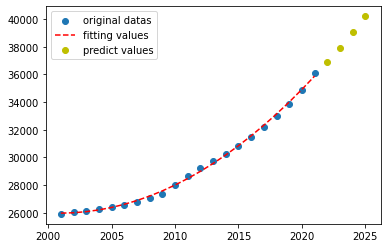

In [82]:
# draw a scatter plot to see the difference between predicted data and true data 
x = np.arange(1,len(population.columns))
y = population.iloc[i,1:]

model = np.polyfit(x,y,k)
fit = np.poly1d(model)
fit_value = fit(x)
pred = fit(pred_x)

plt.scatter(range(2001,2022),y,marker='o',label='original datas')
plt.plot(range(2001,2022),fit_value,ls='--',c='red',label='fitting values')
plt.plot(range(2022,2026),pred,'o',c='y',label='predict values')
plt.legend()

In [91]:
predicted_population = pd.read_csv('../data/raw/predict_population')

predicted_population = predicted_population.drop(columns='Unnamed: 0')

predicted_population = pd.concat([population, predicted_population], axis=1)

predicted_population = predicted_population[['Postcode', '2021', '0', '1', '2', '3']]

predicted_population = predicted_population.rename(columns={'0' : '2022', '1' : '2023', '2' : '2024', '3' : '2025'})

predicted_population.to_csv('../data/curated/predicted_population')